# Diabetes (clustering)
 다음의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화(clustering)하여라.

1. sklearn을 이용하지 않고 (자신의 코드로)
2. sklearn을 이용해서
3. cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

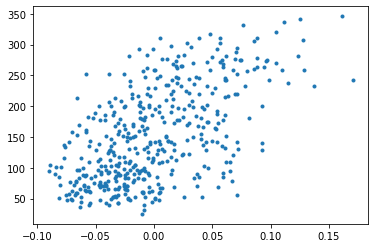

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
diabetes=datasets.load_diabetes()
diabetes.keys()
diabetes.DESCR

X_p=diabetes.data[:,2] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
plt.plot(X_p,X_d,'.');

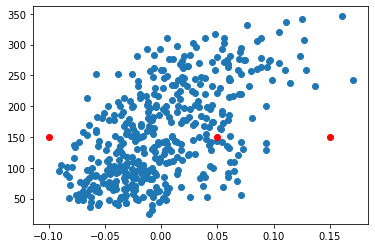

In [2]:
# 1. sklearn을 이용하지 않고 (자신의 코드로)
cen = [[-0.1,0.05,0.15],[150,150,150]]
x1 = X_p
x2 = X_d
plt.scatter(x1,x2)
plt.plot(cen[0],cen[1],'ro');

In [ ]:
r1 = (x1-cen[0][0])**2 + (x2-cen[1][0])**2
r2 = (x1-cen[0][1])**2 + (x2-cen[1][2])**2
r3 = (x1-cen[0][2])**2 + (x2-cen[1][2])**2

g = np.array([])
for i in range(len(r1)):
    g = np.append(g,np.argmin([r1[i],r2[i],r3[i]]))

a=[]
for j in range(3):
    a.append([np.mean([x1[i] for i in np.where(g==j)]), np.mean([x2[i] for i in np.where(g==j)])])

n,a1,a2 = 0,0,0
for i in range(len(r1)):
    if(g[i]==0):
        n = n+1
        a1 = a1+x1[i]
        a2 = a2+x2[i]
a1/n,a2/n       

(-0.048790529136490395, 105.8843537414966)

In [ ]:
c1 = [a[0][0], a[0][1]]
c2 = [a[1][0], a[1][1]]
c3 = [a[2][0], a[2][1]]

plt.scatter(x1,x2,c=g)
plt.plot(cen[0],cen[1],'bo')
plt.plot([i[0] for i in a],[i[1] for i in a],'ro');

In [ ]:
# 2. sklearn을 이용해서

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
X = [X_p,X_d]
data = np.transpose(X)
kmeans.fit(data)

In [ ]:
plt.scatter(X_p,X_d,c=kmeans.labels_)

In [ ]:
kiner = {}
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_
plt.plot(list(kiner.keys()),list(kiner.values()));

inertia는 cluster 중심과 cluster에 속한 데이터 사이의 거리의 제곱이다. 따라서 inertia value는 cluster에 속한 데이터들이 얼마나 가깝게 있는지 모여있는지를 나타낸다고 볼 수 있다. 일반적으로 cluster의 개수를 늘려가면 cluster 각각의 크기는 줄어들기 때문에, inertia 또한 줄어들지만 개수에 따른 변화를 살펴보면 그래프의 기울기가 꺾이면서 완만해지는 구간이 있다. 이 꺾인 지점 이후로는 cluster의 개수를 늘리더라도 밀집된 정도가크게 개선되지 않는 다는 것을 의미한다. 따라서 급격히 꺾이는 부분에 cluster 개수가 최척의 cluster 개수이다.
위 그래프에서는 cluster 개수가 3개 일때를 최적의 개수라고 볼 수 있다.